<a href="https://colab.research.google.com/github/StanleyLiangYork/TensorFlow_For_Image/blob/master/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install opencv-python

In [61]:
import os
import zipfile

if not os.path.exists('openCV.zip'):
   !gsutil cp gs://pet-detect-239118/openCV.zip ./openCV.zip

with zipfile.ZipFile('openCV.zip') as zipObj:
  zipObj.extractall()

Detect human face

In [62]:
import cv2
from matplotlib import pyplot as plt

def fix_display(img):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.axis(False)
    ax.imshow(new_img)
    return new_img

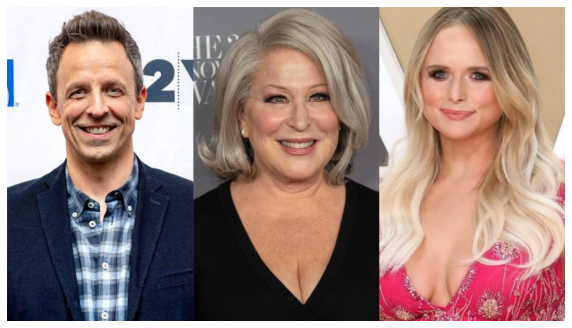

In [68]:
img = cv2.imread('openCV/people_3.jpg')
image = fix_display(img)

3 person is found


(-0.5, 930.5, 523.5, -0.5)

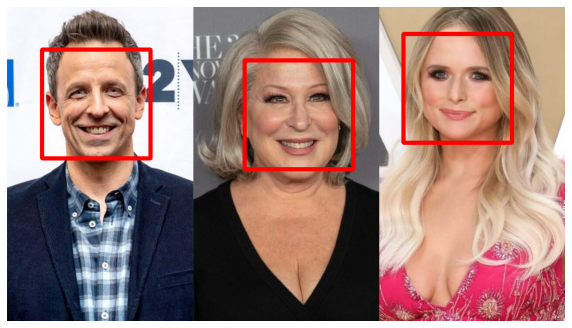

In [80]:
img = cv2.imread('openCV/people_3.jpg')
image = fix_display(img)
face_detector = cv2.CascadeClassifier('/content/openCV/haarcascade_frontalface_default.xml')
faces = face_detector.detectMultiScale(image, 1.4, 3)
print(f'{len(faces)} person is found')

rois = []
for (x,y,w,h) in faces:
  face = image[y:y+h,x:x+w]
  cv2.rectangle(image, (x,y),(x+w,y+h),(255,0,0),5) #heigh first, width next
  rois.append(face)

plt.imshow(image)
plt.axis(False)

Detect eyes

(-0.5, 930.5, 523.5, -0.5)

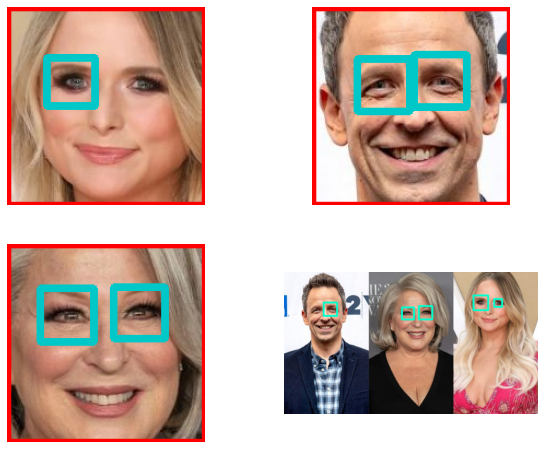

In [81]:
img = cv2.imread('openCV/people_3.jpg')
image = fix_display(img)
eye_detector = cv2.CascadeClassifier('/content/openCV/haarcascade_eye.xml')

for i in range(3):
  face = rois[i]
  eyes = eye_detector.detectMultiScale(face, 1.3,5)
  for (x,y,w,h) in eyes:
    cv2.rectangle(face, (x,y),(x+w,y+h), (0,200,200), 5)
  
  ax = plt.subplot(2,2,i+1)
  plt.imshow(face)
  plt.axis('off')

eyes = eye_detector.detectMultiScale(image,1.3, 5)
for (x,y,w,h) in eyes:
  cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,205), 5)

ax = plt.subplot(2,2,4)
plt.imshow(image)
plt.axis(False)


Pedestrian detection

3 person is found


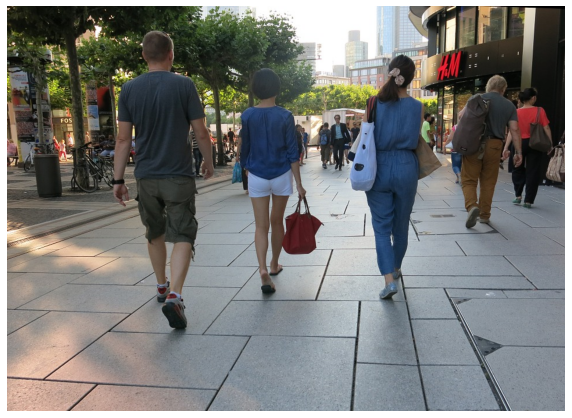

In [112]:
body_detector = cv2.CascadeClassifier('/content/openCV/haarcascade_fullbody.xml')
img = cv2.imread('/content/openCV/pedestrian_2.jpg')
image = fix_display(img)
people = body_detector.detectMultiScale(image, 1.2, 4)
print(f'{len(people)} person is found')

(-0.5, 959.5, 695.5, -0.5)

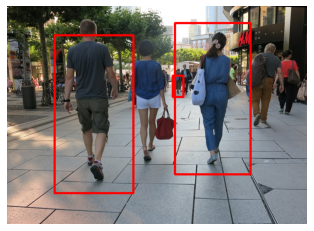

In [113]:
for (x,y,w,h) in people:
  cv2.rectangle(image, (x,y),(x+w,y+h),(255,0,0),5)

plt.imshow(image)
plt.axis(False)

Detect car plate

1 plate is found


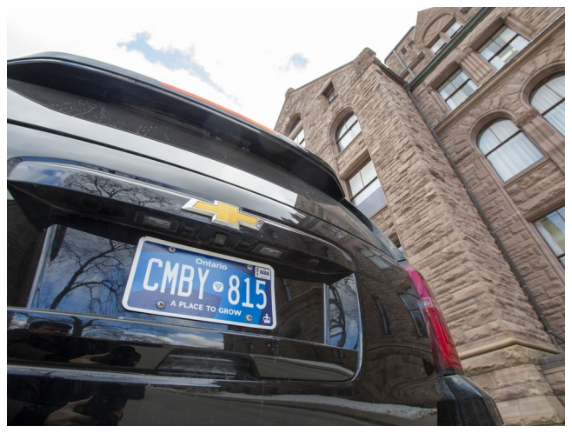

In [130]:
plate_detector = cv2.CascadeClassifier('/content/openCV/haarcascade_russian_plate_number.xml')
img = cv2.imread('/content/openCV/car_plate_3.jpg')
image = fix_display(img)
cars = body_detector.detectMultiScale(image,1.2,1)
print(f'{len(cars)} plate is found')

(-0.5, 641.5, 481.5, -0.5)

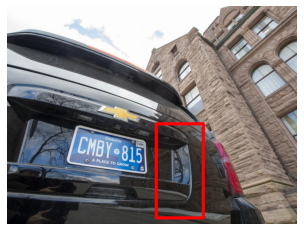

In [131]:
for (x,y,w,h) in cars:
  cv2.rectangle(image, (x,y),(x+w,y+h),(255,0,0),5)

plt.imshow(image)
plt.axis(False)

In [7]:
from collections import namedtuple
import numpy as np
import cv2
 
# define the `Detection` object
Detection = namedtuple("Detection", ["image_path", "gt", "pred"])

Detection("cat02.jpg", [39, 63, 203, 112], [54, 66, 198, 114])
Detection.gt[:2]

TypeError: ignored

In [ ]:

def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
 
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
 
	# return the intersection over union value
	return iou

In [ ]:
# define the list of example detections
examples = [
	Detection("cat02.jpg", [39, 63, 203, 112], [54, 66, 198, 114])
]

detection = examples[0]
detection.gt[:3]
(type(detection.))

In [ ]:
# loop over the example detections
from google.colab.patches import cv2_imshow
for detection in examples:
	# load the image
	image = cv2.imread(detection.image_path)
 
	# draw the ground-truth bounding box along with the predicted
	# bounding box
	cv2.rectangle(image, tuple(detection.gt[:2]), 
		tuple(detection.gt[2:]), (0, 255, 0), 2)
	cv2.rectangle(image, tuple(detection.pred[:2]), 
		tuple(detection.pred[2:]), (0, 0, 255), 2)
 
	# compute the intersection over union and display it
	iou = bb_intersection_over_union(detection.gt, detection.pred)
	cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
	print("{}: {:.4f}".format(detection.image_path, iou))
 
	# show the output image
	cv2_imshow(image)

In [ ]:
from zipfile import ZipFile

with ZipFile('JPEGImages.zip', 'r') as zipfn:
  zipfn.extractall()

In [ ]:
with ZipFile('Annotations.zip', 'r') as zipfn:
  zipfn.extractall()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
keras = tf.keras

In [ ]:
import tensorflow_datasets as tfds


tfds.disable_progress_bar()
SPLIT_WEIGHTS = (8, 1, 1)
splits = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)

(raw_train, raw_validation, raw_test), metadata = tfds.load('cats_vs_dogs', split=list(splits), with_info=True, as_supervised=True)

In [ ]:
print(raw_train)
print(raw_validation)
print(raw_test)

In [ ]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))
  print(get_label_name(label))

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)


In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

feature_batch = base_model(image_batch)
print(feature_batch.shape)

freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model.trainable = False
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

To generate predictions from the block of features, average over the spatial 5x5 spatial locations, using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])
model.summary()

The 2.25M parameters in MobileNet are frozen, but there are 1.2K trainable parameters in the Dense layer. These are divided between two tf.Variable objects, the weights and biases.

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
len(model.trainable_variables)

In [ ]:
num_train, num_val, num_test = (
  metadata.splits['train'].num_examples*weight/10
  for weight in SPLIT_WEIGHTS
)

In [ ]:
initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

## **Read, display, write images**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('justin.jpg')
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('justin_new.png', img)

In [ ]:
img.shape  # height, width, channel

In [ ]:
print(type(img))
print(img.dtype)
print(img.size)

In [ ]:
# Access and print pixel in the top right corner
top_right_px = img[0,399,:]
print(top_right_px)
# Access the print the red channel value (B,G,R)
top_right_px_R = img[0,399,2]
print(top_right_px_R)

In [ ]:
print(img[0,0]) #get all channels on the top left
img[0:10,0:10]=[0,0,0]
cv2_imshow(img)

In [ ]:
# change the top right pixel to be red [0,0,255]
img[0:10,389:399]=[0,0,255]
cv2_imshow(img)

In [ ]:
# use numpy.item() and numpy.itemset() functions
# the the green channel value at point(25,25)
print(img.item(25,25,1))
# modify the blue channel value at point (15,15) to 150
img.itemset((15,15,0),150)
print(img.item(15,15,0))

# **Implement a region of interest (ROI)**

In [ ]:
# ROI of face only by defining pixel location
face_ROI = img[25:355, 10:280]
# show the ROI of face
cv2_imshow(face_ROI)

In [ ]:
import cv2
# ROI of the eyes only by using selectROI to draw rectangle
(x,y,w,h)=cv2.selectROI('My eyes', img)
eyes_ROI = img[y:y+h, x:x+w]
cv2_imshow(eyes_ROI)